# Plotting 3D Search Spaces

### Written by: Davi A. Dal Fabbro, FEI.
##### Contributors:

As I was making progress on my Master's thesis, I needed to figure a way to show visualizations of functions with 3 variables, so I created a Python script that allows me to visualize it using contour surfaces. This is a tutorial showing how I implemented this Python script and how it helped me gain insights about a function that would otherwise be extremely hard to visualize.

## Introduction

Python has some great packages for plotting functions. The most widely used is `matplotlib`, which has some awesome graphing features to create plots pretty enough to meet scientific journals standards. In fact, I challenged myself to plot all my thesis results using exclusively `matplotlib`.

When I was taking optimization classes, plotting functions was extremely important to visualize the search space (domain) I was dealing with, and choose the most adequate algorithm accordingly.

Most books and lectures depicts optimization algorithms on functions with 1 or 2 variables. This is actually reasonable since from 2 variables and beyond, the algorithms work the same way.

Nonetheless, I still wanted to visualize the search space of functions with 3 variables, and then, I created a Python function that plots a 3D search space using `matplotlib`. There are other tools that allows you to visualize 3D search spaces such as [`mayavi`](http://code.enthought.com/projects/mayavi/) and [`skimage`](http://scikit-image.org/docs/dev/auto_examples/edges/plot_marching_cubes.html), but I found an implemenation on `matplotlib` to be the most appropriate, since all my plots were made using this package.

## Importing the libraries

The libraries used in this tutorial are:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Plotting One Variable Functions

Starting with the simplest case, one variable functions have 1D search space. This means that the search space is a line, which would be very boring to visualize.

In this case, besides the search space, a one variable function plot also contains the image of the function.

Considering the following quadractic funtion:

\begin{equation}
    f(x)=x^2
\end{equation}

The Python script that plots this function is:

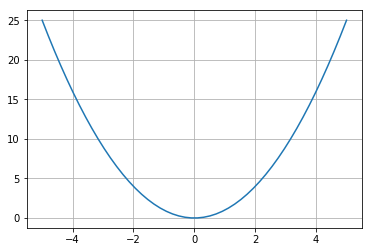

In [2]:
x = np.linspace(-5,5,50)
fun = x**2

plt.grid()
plt.plot(x,fun)

## Plotting Two Variables Functions

Moving on to two variables functions, we end up with 2D search spaces, which turns out to be a surface. This makes things a bit more interesting since now we can either have a 2D representation of the function using contour lines, or plot the search space along with the image of the function through a 3D plot.

Considering the 2D case for a quadractic funtion:

\begin{equation}
    f(x_1,x_2)=x_1^2+x_2^2
\end{equation}

The Python script that plot both styles is:

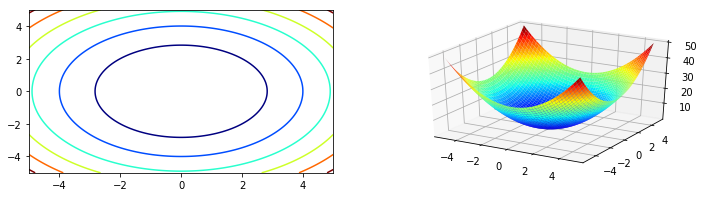

In [3]:
x = np.linspace(-5, 5, 100)
x1, x2 = np.meshgrid(x, x)
fun = x1**2 + x2**2

fig = plt.figure(figsize=(12,3))

ax = fig.add_subplot(1, 2, 1)
ax.contour(x1,x2,fun,cmap='jet')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(x1, x2, fun, cmap='jet')

These plots are as far as most articles about optimization go.

Indeed, it is not that necessary to visualize 3D seach spaces since most algorithms generalize well for higher dimension, but visualizing these search spaces can still bring insights about the domain that would otherwise be extremely difficult to grasp.

## Plotting Three Variable Functions

Finally, it is time to visualize 3D search spaces. We've reached a point in which a plot containing the domain and image of a function requires a fourth dimension. This means that at this point we can only visualize a funtion through its search space, which, fortunately, is enough to understand what's going on.

Instead of dealing with contour lines, as in two variables functions, three variables use contour surfaces, which is composed of [isosurfaces](https://en.wikipedia.org/wiki/Isosurface).

Contour surfaces creates a volume of data points, meaning the we can't see what's "inside" this volume unless we plot a cross section of it. This is where my idea to create this Python script came from.

The idea is simple: instead of plotting the whole volume, it will plot only the surfaces that are visible. After joining these surfaces as a cube, we have a perspective which feels three dimensional.

I created a Python function for this and named it `cross_dection_3d()`. It takes some arguments, but for now let's just define and visualize its results.

First, let's consider consider a 3D quadractic function:

\begin{equation}
    f(x_1,x_2,x_3)=x_1^2+x_2^2+x_3^2
\end{equation}

In Python we can define this function as:

In [4]:
def fun(x1,x2,x3):
   return x1**2+x2**2+x3**2

**Fun fact:** This function is also called the [Sphere Function](https://www.sfu.ca/~ssurjano/spheref.html) because the search space is a circle in 2 dimensions, a sphere in 3 and a hypersphere in higher dimensions.

Next, we define `cross_section_3d()`.

### `cross_section_3d()`

In [5]:
def cross_section_3d(ax,fun,levels,xlim,ylim,zlim,mid,style='contour',colors='gray',res=61):
   
   levels = np.linspace(levels[0],levels[1],levels[2]).tolist()
   cset = [[],[],[],[]]

   range_ = [[xlim[0],mid[0],ylim[0],mid[1],mid[2]],[mid[0],xlim[1],ylim[0],mid[1],zlim[1]],
             [xlim[0],mid[0],mid[1],ylim[1],zlim[1]],[mid[0],xlim[1],mid[1],ylim[1],zlim[1]]]
   for key, i in enumerate(range_):
       x1 = np.linspace(i[0],i[1],int((float(i[1]-i[0]))/(xlim[1]-xlim[0])*res))
       x2 = np.linspace(i[2],i[3],int((float(i[3]-i[2]))/(ylim[1]-ylim[0])*res))
       X1,X2 = np.meshgrid(x1,x2)
       y = fun(X1,X2,i[4])
       if style == 'contour':
           cset[key] = ax.contour(X1, X2, y, zdir='z',levels=levels, offset=i[4],cmap=colors,
                                                              linewidths=1,linestyles='solid')
       else:
           cset[key] = ax.contourf(X1, X2, y, zdir='z',levels=levels, offset=i[4],cmap=colors)
   
   range_ = [[ylim[0],mid[1],mid[2],zlim[1],mid[0]],[mid[1],ylim[1],zlim[0],mid[2],xlim[0]],
             [ylim[0],mid[1],zlim[0],mid[2],xlim[0]],[mid[1],ylim[1],mid[2],zlim[1],xlim[0]]]
   for key, i in enumerate(range_):
       x2 = np.linspace(i[0],i[1],int((float(i[3]-i[2]))/(ylim[1]-ylim[0])*res))
       x3 = np.linspace(i[2],i[3],int((float(i[3]-i[2]))/(zlim[1]-zlim[0])*res))
       X2,X3 = np.meshgrid(x2,x3) 
       y = fun(i[4],X2,X3)
       if style == 'contour':
           cset[key] = ax.contour(y, X2, X3, zdir='x',levels=levels, offset=i[4],cmap=colors,
                                                              linewidths=1,linestyles='solid')
       else:
           cset[key] = ax.contourf(y, X2, X3, zdir='x',levels=levels, offset=i[4],cmap=colors)
    
   range_ = [[xlim[0],mid[0],mid[2],zlim[1],mid[1]],[mid[0],xlim[1],mid[2],zlim[1],ylim[0]],
             [xlim[0],mid[0],zlim[0],mid[2],ylim[0]],[mid[0],xlim[1],zlim[0],mid[2],ylim[0]]]
   for key, i in enumerate(range_):
       x1 = np.linspace(i[0],i[1],int((float(i[1]-i[0]))/(xlim[1]-xlim[0])*res))
       x3 = np.linspace(i[2],i[3],int((float(i[3]-i[2]))/(zlim[1]-zlim[0])*res))
       X1,X3 = np.meshgrid(x1,x3)
       y = fun(X1,i[4],X3)
       if style == 'contour':
           cset[key] = ax.contour(X1, y, X3, zdir='y',levels=levels, offset=i[4],cmap=colors,
                                                              linewidths=1,linestyles='solid')
       else:
           cset[key] = ax.contourf(X1, y, X3, zdir='y',levels=levels, offset=i[4],cmap=colors)
    
   #z-axis lines
   ax.plot([xlim[0],xlim[0]],[ylim[0],ylim[0]],[zlim[0],mid[2]],c='k',lw=1,zorder=1e+99)
   ax.plot([mid[0],mid[0]],[ylim[0],ylim[0]],[mid[2],zlim[1]],c='k',lw=1,zorder=1e+99)
   ax.plot([xlim[1],xlim[1]],[ylim[0],ylim[0]],[zlim[0],zlim[1]],c='k',lw=1,zorder=1e+99)
   ax.plot([xlim[0],xlim[0]],[mid[1],mid[1]],[mid[2],zlim[1]],c='k',lw=1,zorder=1e+99)
   ax.plot([xlim[0],xlim[0]],[ylim[1],ylim[1]],[zlim[0],zlim[1]],c='k',lw=1,zorder=1e+99)
   ax.plot([mid[0],mid[0]],[mid[1],mid[1]],[mid[2],zlim[1]],c='k',lw=1,zorder=1e+99)
   
   #x-axis lines
   ax.plot([xlim[0],mid[0]],[ylim[0],ylim[0]],[mid[2],mid[2]],c='k',lw=1,zorder=1e+99)
   ax.plot([mid[0],xlim[1]],[ylim[0],ylim[0]],[zlim[1],zlim[1]],c='k',lw=1,zorder=1e+99)
   ax.plot([xlim[0],xlim[1]],[ylim[0],ylim[0]],[zlim[0],zlim[0]],c='k',lw=1,zorder=1e+99)
   ax.plot([xlim[0],xlim[1]],[ylim[1],ylim[1]],[zlim[1],zlim[1]],c='k',lw=1,zorder=1e+99)
   ax.plot([xlim[0],mid[0]],[mid[1],mid[1]],[zlim[1],zlim[1]],c='k',lw=1,zorder=1e+99)
   ax.plot([xlim[0],mid[0]],[mid[1],mid[1]],[mid[2],mid[2]],c='k',lw=1,zorder=1e+99)
   
   #y-axis lines
   ax.plot([xlim[0],xlim[0]],[ylim[0],mid[1]],[mid[2],mid[2]],c='k',lw=1,zorder=1e+99)
   ax.plot([xlim[0],xlim[0]],[mid[1],ylim[1]],[zlim[1],zlim[1]],c='k',lw=1,zorder=1e+99)
   ax.plot([xlim[0],xlim[0]],[ylim[0],ylim[1]],[zlim[0],zlim[0]],c='k',lw=1,zorder=1e+99)
   ax.plot([xlim[1],xlim[1]],[ylim[0],ylim[1]],[zlim[1],zlim[1]],c='k',lw=1,zorder=1e+99)
   ax.plot([mid[0],mid[0]],[ylim[0],mid[1]],[zlim[1],zlim[1]],c='k',lw=1,zorder=1e+99)
   ax.plot([mid[0],mid[0]],[ylim[0],mid[1]],[mid[2],mid[2]],c='k',lw=1,zorder=1e+99)
          
   ax.set_xlim3d(xlim[0]*.97,xlim[1]*.97)
   ax.set_ylim3d(ylim[0]*.97,ylim[1]*.97)
   ax.set_zlim3d(zlim[0]*.97,zlim[1]*.97)
   
   ax.set_xlabel('x1')
   ax.set_ylabel('x2')
   ax.set_zlabel('x3')
   
   ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
   ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
   ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
   
   ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
   ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
   ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
   
   ax.grid(False)

Finally, we are ready to visualize the 3D seach space for this function:

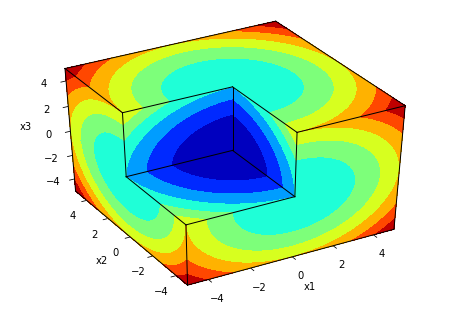

In [6]:
fig = plt.figure()
ax = Axes3D(fig, azim = -120, elev = 40)

cross_section_3d(ax,fun,levels=[0,75,10],xlim=[-5,5],ylim=[-5,5],zlim=[-5,5],mid=[0,0,0],
                 style='contourf',colors='jet',res=61)

Now that we know the result, let's go through the parameters:

* `ax`: A `matplotlib` figure object;

* `fun`: A three variable function that you want to analyse;

* `levels`: A list containing the minimun, maximum and number of levels for coloring;

* `xlim`, `ylim`, `zlim`: The boundaries for plotting;

* `mid`: A list containing the coordinates where the cross section occurs;

* `style`: The style of plot. Could either be `contour` or `contourf`;

* `colors`: The coloring option for the plot;

* `res`: Amount of values calculated.

Looking at the parameters, we see that most of them are aesthetic. The important parameter here to explore is `mid`.

This parameters allows to explore new cross sections and see hidden features in the search space.

Let's try some random values for `mid`:

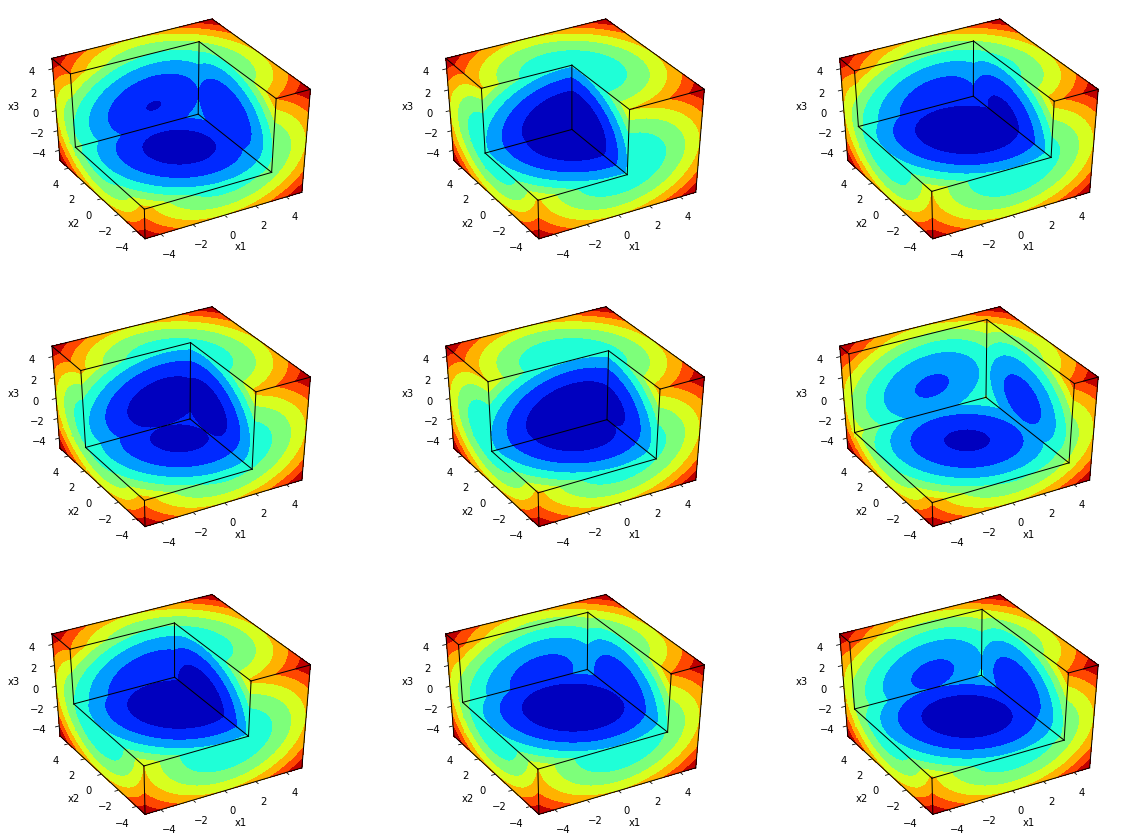

In [7]:
fig = plt.figure(figsize=(20,15))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1, projection = '3d', azim = -120, elev = 40)
    
    mid = [np.random.rand()*4,np.random.rand()*4,np.random.rand()*-4]
    cross_section_3d(ax,fun,levels=[0,75,10],xlim=[-5,5],ylim=[-5,5],zlim=[-5,5],mid=mid,
                       style='contourf',colors='jet',res=61)

## Extra

It's time to try a different function, say:

\begin{equation}
    f(x_1,x_2,x_3)= cos(x_1)+cos(x_2)+cos(x_3)
\end{equation}

In Python:

In [8]:
def fun2(x, y, z):
    return np.cos(x) + np.cos(y) + np.cos(z)

Playing with the parameters it's possible to get different results:

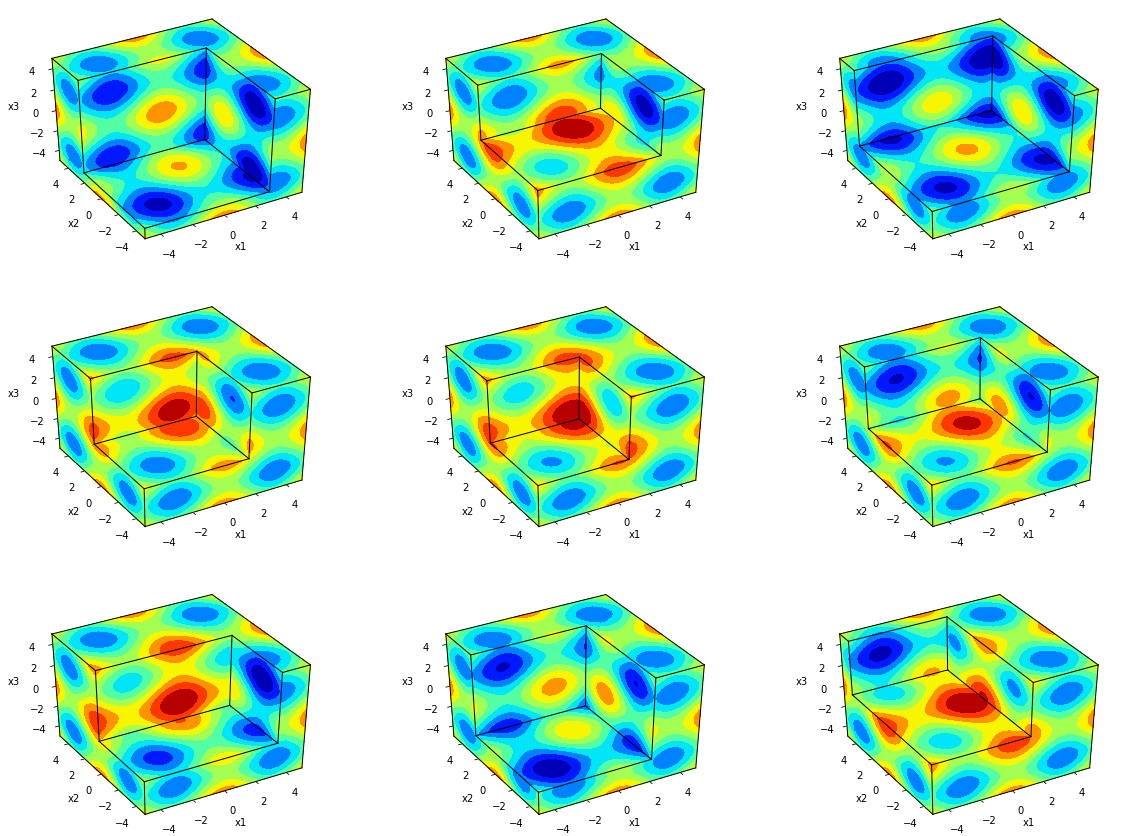

In [9]:
fig = plt.figure(figsize=(20,15))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1, projection = '3d', azim = -120, elev = 40)
    
    mid = [np.random.rand()*4,np.random.rand()*4,np.random.rand()*-4]
    cross_section_3d(ax,fun2,levels=[-3,3,11],xlim=[-5,5],ylim=[-5,5],zlim=[-5,5],mid=mid,
                       style='contourf',colors='jet',res=61)